In [1]:
import  pandas as pd
import numpy as np

from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
plt.style.use('dark_background')

In [2]:
df=pd.read_csv('dadoB3_test.csv', sep=';', encoding='latin1', parse_dates=['ano'])
df.head()

,ano,Inv_tl,Inv_fem,Inv_Masc,<24,25-39,40-59,>60,Neg_Vol_Bi,vl_invest,posi_Total_Bi,busca_as_inves,busca_ass_acoes,inter_bank,mepoupe_views,club_valor_views,econo_views,pL_views,Saldo Mediano >14
0,2013-01-01,589276,148549,440727,1903.000,111962.44,141426.24,329994.56,2.3,14.0,115,106000,149000,21576,0.0,0.0000,0.0000,0.0000,0
1,2014-01-01,564116,137794,426322,2353.000,112823.20,135387.84,315904.96,2.0,12.0,106,109000,170000,25980,0.0,0.0000,0.0000,0.0000,1
2,2015-01-01,557109,132427,424682,2346.000,116992.89,133706.16,300838.86,1.9,11.0,89,137000,145000,31694,1493930.0,0.0000,0.0000,135267.0000,0
3,2016-01-01,564024,130265,433759,10716.456,135365.76,135365.76,287652.24,2.5,17.0,122,196000,217000,38081,1345991.5,235266.0000,708742.8333,267472.0000,1
4,2017-01-01,619625,141738,477887,13012.125,173495.00,34017.12,224606.89,3.0,20.0,166,273000,245000,46164,1861526.0,175638.6364,961679.8889,309964.7333,1


In [3]:
dff = df.set_index('ano')
dff_1 = dff[['busca_as_inves','busca_ass_acoes', 'inter_bank', 'mepoupe_views', 'club_valor_views','econo_views', 'pL_views']]

In [4]:
dff_1.plot()

plt.rcParams['figure.figsize'] = (15,10)

plt.grid(True)
plt.title('aumento de valores ref. investimento')
plt.savefig('temporaisInternet.png')
plt.close()


Há um aumento no ano de 2015 dos views dos canais: Me poupe!, econometria e Patricia Lages. em 2016 houve um aumento do numero de busca por assuntos referentes a ações e investimentos, juntamente com uma sutil elevação da quantidade de investidores com até 39 anos de idade. 
    em 2017 junto com aumento de views dos canais Me poupe!, econometria é possivel observar uma alta no número total de investidores, que demonstra um prevalencia masculina. No entanto em 2018 quando há um sutil queda no views dos canais ha um aumento significativo no numero de investidoes menor de 39 e muheres.

Text(0.5, 1.0, 'aumento de valores ref. investimento')

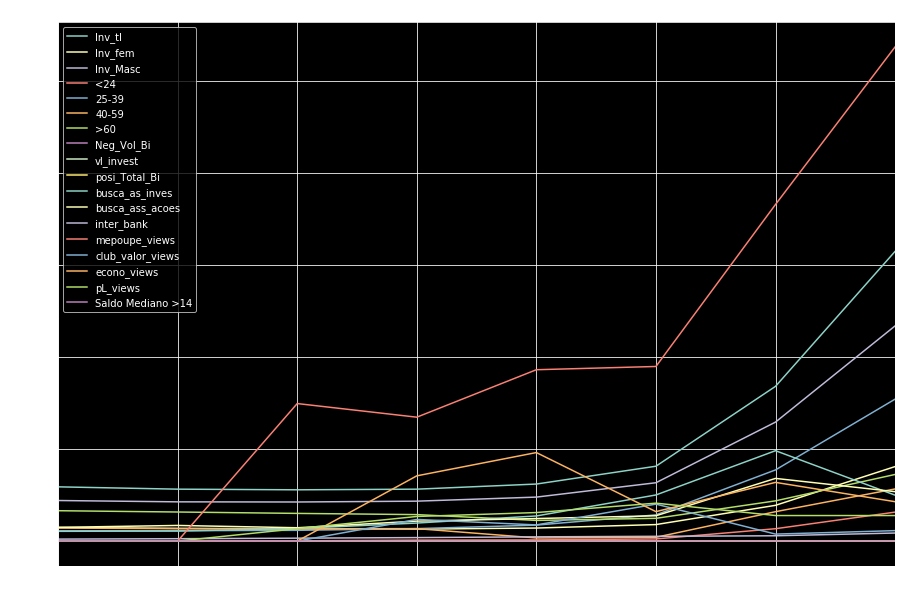

In [5]:
dff.plot()

plt.rcParams['figure.figsize'] = (15,10)
#plt.yticks(range(0, 2e7)) # mudar escala do eixo Y
plt.grid(True)
plt.title('aumento de valores ref. investimento')
#plt.savefig('temporais.png')

In [6]:
dff.corr()

,Inv_tl,Inv_fem,Inv_Masc,<24,25-39,40-59,>60,Neg_Vol_Bi,vl_invest,posi_Total_Bi,busca_as_inves,busca_ass_acoes,inter_bank,mepoupe_views,club_valor_views,econo_views,pL_views,Saldo Mediano >14
Inv_tl,1.000000,0.998129,0.999772,0.998941,0.999239,0.948069,0.959323,0.971620,-0.430084,0.827672,0.573632,0.792788,0.911619,0.914553,-0.017177,0.173865,0.311373,-0.494241
Inv_fem,0.998129,1.000000,0.996598,0.998000,0.995225,0.953344,0.969382,0.958052,-0.454520,0.793351,0.523013,0.756587,0.896972,0.896541,-0.042137,0.146281,0.275030,-0.497780
Inv_Masc,0.999772,0.996598,1.000000,0.998390,0.999760,0.945394,0.954969,0.975499,-0.421179,0.838918,0.590788,0.804722,0.915927,0.920032,-0.008453,0.183337,0.323780,-0.492572
<24,0.998941,0.998000,0.998390,1.000000,0.998103,0.952647,0.961544,0.965370,-0.431017,0.817600,0.558880,0.787562,0.911137,0.916539,-0.025101,0.195080,0.309033,-0.485826
25-39,0.999239,0.995225,0.999760,0.998103,1.000000,0.940636,0.949268,0.978356,-0.406399,0.845244,0.599932,0.810849,0.923799,0.927339,0.006777,0.201336,0.342424,-0.481215
40-59,0.948069,0.953344,0.945394,0.952647,0.940636,1.000000,0.990386,0.864233,-0.640418,0.712724,0.465523,0.731173,0.756125,0.805804,-0.262253,0.027089,0.061247,-0.619392
>60,0.959323,0.969382,0.954969,0.961544,0.949268,0.990386,1.000000,0.873151,-0.631097,0.684562,0.406519,0.677751,0.767926,0.792160,-0.233775,-0.018723,0.055257,-0.595440
Neg_Vol_Bi,0.971620,0.958052,0.975499,0.965370,0.978356,0.864233,0.873151,1.000000,-0.245997,0.914949,0.709582,0.860873,0.956859,0.942139,0.169514,0.286217,0.485596,-0.403423
vl_invest,-0.430084,-0.454520,-0.421179,-0.431017,-0.406399,-0.640418,-0.631097,-0.245997,1.000000,-0.076020,0.058338,-0.159697,-0.086693,-0.197568,0.750592,0.635347,0.582253,0.683302
posi_Total_Bi,0.827672,0.793351,0.838918,0.817600,0.845244,0.712724,0.684562,0.914949,-0.076020,1.000000,0.922399,0.978059,0.858065,0.878285,0.190876,0.426653,0.547301,-0.361636


podemos identificar um correlação entre número de investidores a busca por assuntos no google em relacao a ações, utilização do internet bank e numero de view do canal me poupe!.
Tambem é possivel verificar relação entre o uso do internetbank\canal me poupe! e o numero de investidores com menos de 39 anos de idade, esta correlação diminue conforme a idade dos investidores aumenta. 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))
sns.heatmap(dff.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.savefig('correlacao.png')
plt.close()
plt.show()

In [8]:
from pandas.plotting import autocorrelation_plot

In [9]:
dfB=pd.read_csv('dadoB3.csv', sep=';', encoding='latin1', parse_dates=['ano'])
df_2=dfB['Inv_tl']
aut = autocorrelation_plot(df_2)
aut.plot()
plt.savefig('auto_inv_Tl.png')
plt.close()

Parece que quantidade de investidores está fracamente correlacionado de forma descendente entre si, quando relacionado ao ano anterior. A série apresenta apenas indicios picos, o que indica que a série não segue um padrão, em relação a quantidade de investidores ao longo do tempo. Bem como a dimuição da autocorrelação entre observações adjacentes e quase adjacentes, de acordo com aumento da janela de tempo analisada. Ou seja, o aumento do número de investidores quando analisados de 2002 até 2020, apresentava uma certa relação, quando observados janelas de até 11 anos, porem quando observamos acima 12 anos a relação  muda de forma acentuada. Indo de encontro com o brusco aumento de investidores, anteriormente ja observados. este comportamento se repete quando observamos a idade dos investidores (<39)

In [10]:
df_2=df['25-39']
aut = autocorrelation_plot(df_2)
aut.plot()
plt.savefig('auto_inv_25-39.png')
plt.close()

In [11]:
df_2=df['<24']
aut = autocorrelation_plot(df_2)
aut.plot()
plt.savefig('auto_inv_24.png')
plt.close()

In [12]:
#selecionando as melhores features
X = dff[['Inv_tl', 'Inv_fem', 'Inv_Masc', '<24', '25-39', '40-59', '>60',
       'Neg_Vol_Bi', 'vl_invest', 'posi_Total_Bi', 'busca_as_inves',
       'busca_ass_acoes', 'inter_bank', 'mepoupe_views', 'club_valor_views',
       'econo_views', 'pL_views']]
y = dff[['Saldo Mediano >14']]

# Criando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)# Treinando modelo
model  = RandomForestClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


array([0.02197802, 0.09340659, 0.01098901, 0.03296703, 0.02417582,
       0.07582418, 0.04395604, 0.03186813, 0.23076923, 0.        ,
       0.01648352, 0.02967033, 0.01648352, 0.04285714, 0.13186813,
       0.15824176, 0.03846154])

In [13]:
feat_names = X.columns

In [14]:
importances = pd.Series(data=model.feature_importances_,index=feat_names)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')
plt.savefig('relaçãofeatures.png')
plt.close()

In [15]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

array([ 1,  1, 10,  6,  1,  7,  3, 13, 12, 11,  5,  4,  1,  9,  2,  8,  1])

In [16]:
for feature,importancia in zip(X.columns,selector.ranking_):
    print("{}:{}".format(feature, importancia))

Inv_tl:1
Inv_fem:1
Inv_Masc:10
<24:6
25-39:1
40-59:7
>60:3
Neg_Vol_Bi:13
vl_invest:12
posi_Total_Bi:11
busca_as_inves:5
busca_ass_acoes:4
inter_bank:1
mepoupe_views:9
club_valor_views:2
econo_views:8
pL_views:1


In [17]:
print (X)

             Inv_tl  Inv_fem  Inv_Masc         <24       25-39      40-59  \
ano                                                                         
2013-01-01   589276   148549    440727    1903.000   111962.44  141426.24   
2014-01-01   564116   137794    426322    2353.000   112823.20  135387.84   
2015-01-01   557109   132427    424682    2346.000   116992.89  133706.16   
2016-01-01   564024   130265    433759   10716.456   135365.76  135365.76   
2017-01-01   619625   141738    477887   13012.125   173495.00   34017.12   
2018-01-01   813291   179392    633899   23585.439   284651.85   41260.16   
2019-01-01  1681033   388497   1292536  134482.640   773275.18  319396.27   
2020-01-01  3147040   809533   2337507  314704.000  1542049.60  566467.20   

                  >60  Neg_Vol_Bi  vl_invest  posi_Total_Bi  busca_as_inves  \
ano                                                                           
2013-01-01  329994.56         2.3       14.0            115          10

podemos inferir que Investidor masculino, menor de 24 anos e entre 25-39 anos, volume negociado, valor investido, posicao total dos investimentos, utilização do internet bank e views em canais do youtube. 

In [18]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(dff.drop('Saldo Mediano >14', axis=1),dff['Saldo Mediano >14'], test_size=0.3)

In [20]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((5, 17), (3, 17), (5,), (3,))

In [21]:
clf = DecisionTreeClassifier()
clf = clf.fit(X1_train,y1_train)
clf.feature_importances_

array([0.        , 0.        , 0.55555556, 0.        , 0.        ,
       0.44444444, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [22]:
pred = clf.predict(X1_test)
print("valor investido predito: % d \n", pred)

valor investido predito: % d 
 [1 1 1]


In [23]:
print(metrics.classification_report(y1_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X1_train,y1_train.ravel())

GaussianNB()

In [25]:
nb_pred = nb.predict(X1_test)
print("valor investido predito: %d\n", nb_pred)

valor investido predito: %d
 [0 1 1]


In [26]:
print(metrics.classification_report(y1_test,nb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X1_train,y1_train.ravel())

RandomForestClassifier(random_state=42)

In [29]:
rf_pred = rf.predict(X1_test)
print("valor investido predito: %d\n", rf_pred)

print(metrics.classification_report(y1_test,rf_pred))

valor investido predito: %d
 [1 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
!pip3 install --upgrade scikit-learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

matrix= plot_confusion_matrix(pred, X_test,y_test)
matrix.ax_.set_title('Confusion Matrix', color='white')
plt.xlabel('Predição' , color='white')
plt.ylabel('Real' , color='white')
plt.show

Requirement already up-to-date: scikit-learn in c:\programdata\anaconda3\lib\site-packages (0.23.2)


ValueError: plot_confusion_matrix only supports classifiers